### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [2]:
data=pd.read_csv('StudentsPerformance.csv')


### check for Null Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Changing column names

In [4]:
data=data.rename(columns={'parental level of education':'parental_level_of_education',
                         'math score':'math_score',
                         'writing score':'writing_score',
                         'reading score':'reading_score',
                         'test preparation course':'test_preparation_course'})
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


### 1. Find out how many males and females participated in the test.

In [5]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

### 2. What do you think about the students' parental level of education?


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '(some college,)'),
  Text(1, 0, "(associate's degree,)"),
  Text(2, 0, '(high school,)'),
  Text(3, 0, '(some high school,)'),
  Text(4, 0, "(bachelor's degree,)"),
  Text(5, 0, "(master's degree,)")])

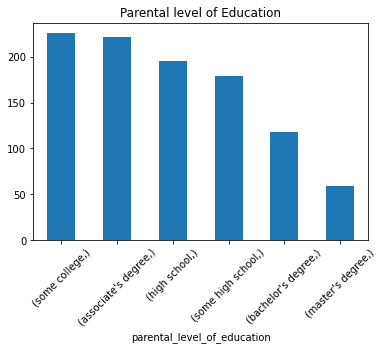

In [6]:
data[['parental_level_of_education']].value_counts().plot(kind='bar')
plt.title('Parental level of Education')
plt.xticks(rotation=45)

In [7]:
data[['parental_level_of_education']].mode()


,parental_level_of_education
0,some college


Most of the parental level of education are some college and least no of parents have completed Masters Degree

### 3. Who scores the most on average for math, reading and writing based on
#### ● Gender

In [8]:
df=data[['gender','math_score','reading_score','writing_score']].groupby('gender').mean()
df


,math_score,reading_score,writing_score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

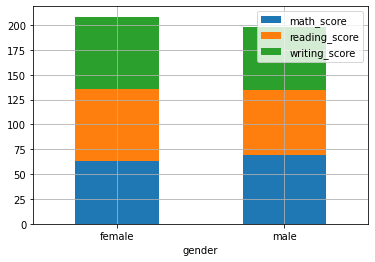

In [9]:
df.plot.bar(stacked=True,grid=True)
plt.xticks(rotation=0)

Males scored the most in Math and Females scored the most for Reading and Writing

#### ● Test preparation course

In [10]:
df1=data[['test_preparation_course','math_score','reading_score','writing_score']].groupby('test_preparation_course').mean()
df1

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


(array([0, 1]), [Text(0, 0, 'completed'), Text(1, 0, 'none')])

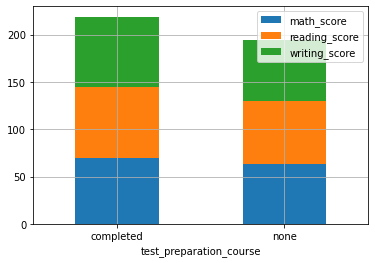

In [11]:
df1.plot.bar(stacked=True,grid=True)
plt.xticks(rotation=0)

Those who completed Test preperation course scored the most in Math, Reading and writing.

### 4. What do you think about the scoring variation for math, reading and writing based on

#### ● Gender

In [12]:
df2=data[['gender','math_score','reading_score','writing_score']].groupby('gender').std()
df2

,math_score,reading_score,writing_score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

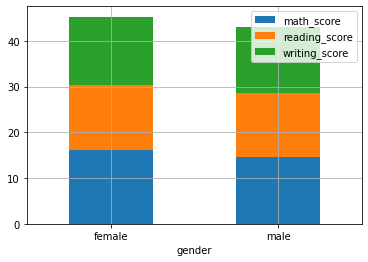

In [13]:
df2.plot.bar(stacked=True,grid=True)
plt.xticks(rotation=0)

 variation of scores for math, reading and writing is least for Males

#### ● Test preparation course

In [14]:
df3=data[['test_preparation_course','math_score','reading_score','writing_score']].groupby('test_preparation_course').std()
df3

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


(array([0, 1]), [Text(0, 0, 'completed'), Text(1, 0, 'none')])

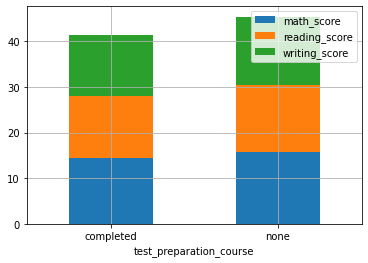

In [15]:
df3.plot.bar(stacked=True,grid=True)
plt.xticks(rotation=0)

variation of scores for math, reading and writing are least for those who completed Test preperation course.


### 5. The management needs your help to give bonus points to the top 25% of students based on their maths score,so how will you help the management to achieve this.



In [16]:
percentile_75=data['math_score'].quantile(q=0.75)
percentile_75

77.0

In [17]:
df4=data.loc[data['math_score'] >= percentile_75]
df4

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
